In [1]:
%pip install "cython<3.0.0"
%pip install "pycaret[full]"
%pip install "scikit-learn-intelex"
%pip install "streamlit"


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pycaret.classification as classification
import os
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import nltk
from scipy import sparse

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /home/amogus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/amogus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
columns = None
with open("fake-news/columns.pkl", "rb") as f:
  columns = pickle.load(f)
columns


Index(['us', 'budget', 'fight', 'loom', 'republican', 'flip', 'fiscal',
       'script', 'washington', 'reuter',
       ...
       'courtroomr', 'karg', 'releasedu', 'blmv', 'treehouseher',
       'grandmotherlast', 'emanuelcurr', 'mondoweiss', 'overdriveread',
       'class_label'],
      dtype='object', length=185782)

In [4]:
sparse_matrix = sparse.load_npz("fake-news/news_tfidf.npz")
joined_tfidf_df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=columns)


In [13]:
stopwords_set = set(stopwords.words("english"))
def preprocess(s: str):
    ps = PorterStemmer()
    s = s.lower()
    s = s.translate(str.maketrans("", "", string.punctuation))
    s = re.sub(r"[^A-Za-z]", " ", s)
    s = re.sub(r"\s+", " ", s)
    s = word_tokenize(s)
    s = [word for word in s if not word in stopwords_set]
    s = [ps.stem(w) for w in s]
    s = " ".join(s).strip()
    return s


In [14]:
tfidf_vectorizer = pickle.load(open('fake-news/text_vectorizer.pkl', 'rb'))


In [6]:
s = classification.setup(joined_tfidf_df, target='class_label', n_jobs=-1, fold=5, preprocess=False, feature_selection=True)


,Description,Value
0,Session id,8558
1,Target,class_label
2,Target type,Binary
3,Original data shape,"(44888, 185782)"
4,Transformed data shape,"(44888, 185782)"
5,Transformed train set shape,"(31421, 185782)"
6,Transformed test set shape,"(13467, 185782)"
7,Numeric features,185781


In [7]:
decision_tree = classification.create_model("dt")


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9975,0.9975,0.9963,0.9988,0.9976,0.9949,0.9949
1,0.9962,0.9962,0.9967,0.9960,0.9963,0.9923,0.9923
2,0.9962,0.9961,0.9979,0.9948,0.9964,0.9923,0.9923
3,0.9954,0.9954,0.9942,0.9969,0.9956,0.9908,0.9908
4,0.9963,0.9963,0.9963,0.9967,0.9965,0.9927,0.9927
Mean,0.9963,0.9963,0.9963,0.9967,0.9965,0.9926,0.9926
Std,0.0007,0.0007,0.0012,0.0013,0.0006,0.0013,0.0013


In [ ]:
final_dt = classification.finalize_model(decision_tree)


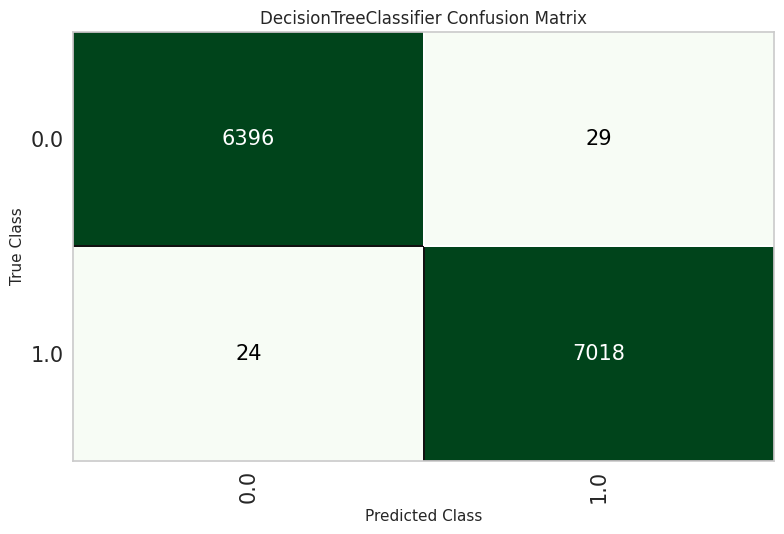

In [10]:
classification.plot_model(final_dt, plot = 'confusion_matrix')


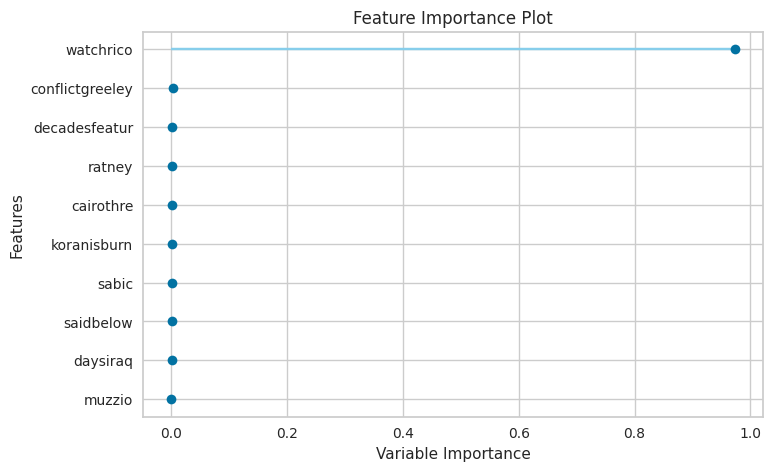

In [22]:
classification.plot_model(final_dt, plot = 'feature')


In [20]:
classification.save_model(final_dt, 'fake_news_pipeline')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('placeholder', None),
                 ('actual_estimator',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', max_depth=None,
                                         max_features=None, max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_samples_leaf=1, min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         monotonic_cst=None, random_state=8558,
                                         splitter='best'))],
          verbose=False),
 'fake_news_pipeline.pkl')

In [21]:
classification.predict_model(final_dt, pd.DataFrame.sparse.from_spmatrix(tfidf_vectorizer.transform(["donald trump win"]), columns=columns[:-1]))


,us,budget,fight,loom,republican,flip,fiscal,script,washington,reuter,...,karg,releasedu,blmv,treehouseher,grandmotherlast,emanuelcurr,mondoweiss,overdriveread,prediction_label,prediction_score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
